[View in Colaboratory](https://colab.research.google.com/github/petroniocandido/pyFTS/blob/master/pyFTS/notebooks/GOOGLE%20COLAB%20Partitioners.ipynb)

# Exploring the Universe of Discourse Partitioners

## Environment Setup

### Library install/update

In [1]:
!pip3 install -U git+https://github.com/petroniocandido/pyFTS
!pip3 install dill

  Cloning https://github.com/petroniocandido/pyFTS to /tmp/pip-req-build-ntm23mp9
  Running setup.py bdist_wheel for pyFTS ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-e9o4j4_4/wheels/84/d7/1e/a333c7128f25b347640740859808db094c4478e98663cd2297
Successfully built pyFTS
    100% |████████████████████████████████| 71kB 4.2MB/s 
  Running setup.py bdist_wheel for dill ... - \ done
  Stored in directory: /content/.cache/pip/wheels/99/c4/ed/1b64d2d5809e60d5a3685530432f6159d6a9959739facb61f2
Successfully built dill


### External libraries import

In [16]:
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pylab as plt

%pylab inline


Populating the interactive namespace from numpy and matplotlib


### Common pyFTS imports 

In [17]:
from pyFTS.partitioners import CMeans, Grid, FCM, Huarng, Entropy, Util as pUtil
from pyFTS.common import Membership as mf
from pyFTS.benchmarks import benchmarks as bchmk
from pyFTS.data import Enrollments

### Common data transformations

In [18]:
from pyFTS.common import Transformations

tdiff = Transformations.Differential(1)

## Dataset

### Data Loading

In [19]:
from pyFTS.data import TAIEX

dataset = TAIEX.get_data()
dataset_diff = tdiff.apply(dataset)

train_split = 1000

### Visualization

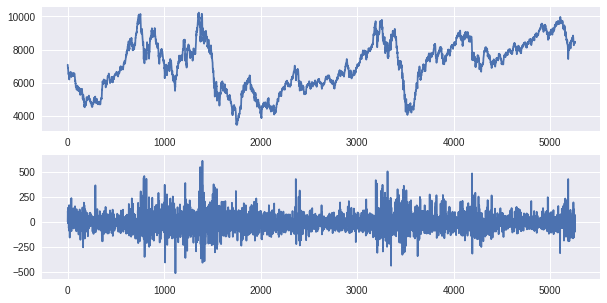

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[10,5])
ax[0].plot(dataset)
ax[1].plot(dataset_diff)

## Exploring partitioning schemes

### Same mathod with different membership functions

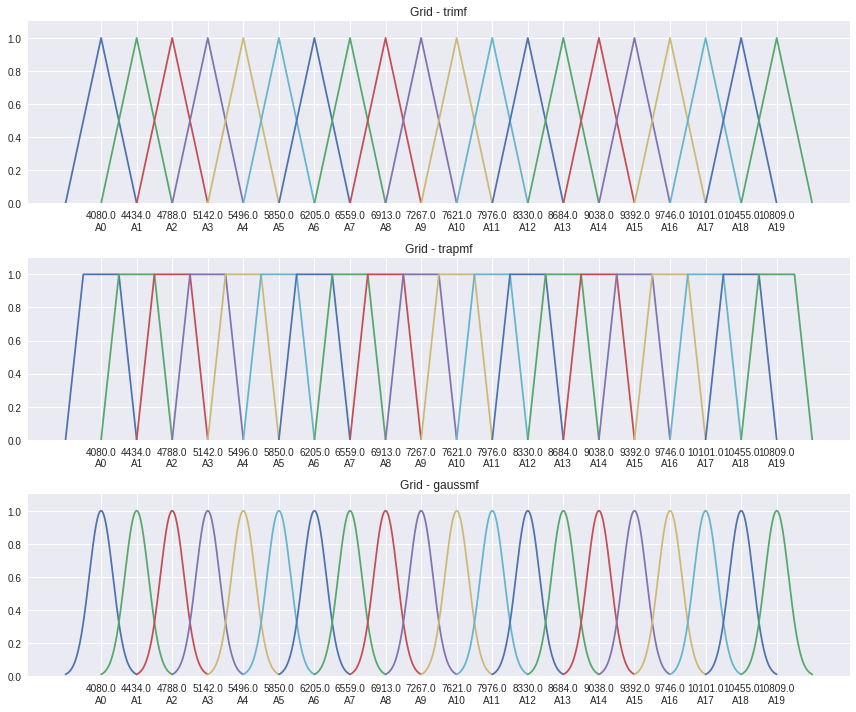

In [11]:
part = pUtil.explore_partitioners(dataset[:train_split], 20, methods=[Grid.GridPartitioner], 
                                  mf=[mf.trimf, mf.trapmf, mf.gaussmf])

In [12]:
for p in part:
    print(p)

Grid - trimf:
A0: trimf([3725.400925, 4079.5785, 4433.756075])
A1: trimf([4079.5785, 4433.756075, 4787.93365])
A2: trimf([4433.756075000001, 4787.933650000001, 5142.111225000001])
A3: trimf([4787.933650000001, 5142.111225000001, 5496.2888])
A4: trimf([5142.111225000001, 5496.2888, 5850.466375])
A5: trimf([5496.288800000001, 5850.466375000001, 6204.643950000001])
A6: trimf([5850.466375000002, 6204.6439500000015, 6558.821525000001])
A7: trimf([6204.6439500000015, 6558.821525000001, 6912.999100000001])
A8: trimf([6558.821525000001, 6912.999100000001, 7267.176675000001])
A9: trimf([6912.999100000002, 7267.1766750000015, 7621.354250000001])
A10: trimf([7267.176675000002, 7621.354250000002, 7975.531825000002])
A11: trimf([7621.354250000002, 7975.531825000002, 8329.709400000002])
A12: trimf([7975.531825000002, 8329.709400000002, 8683.886975000001])
A13: trimf([8329.709400000002, 8683.886975000001, 9038.064550000001])
A14: trimf([8683.886975000003, 9038.064550000003, 9392.242125000002])
A15: t

### Same mathod with different membership functions and transformation

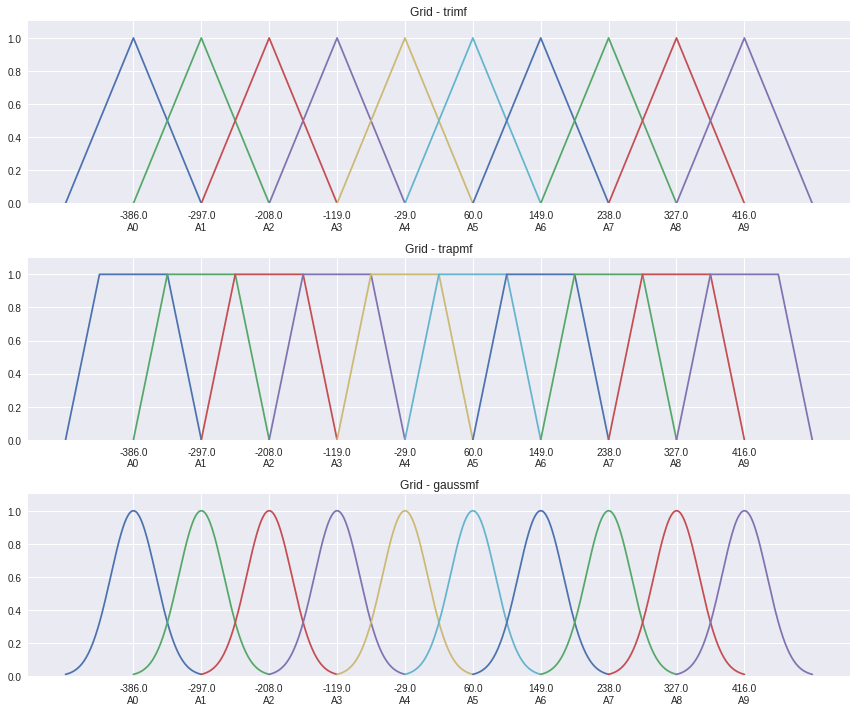

In [13]:
part = pUtil.explore_partitioners(dataset[:train_split], 10, methods=[Grid.GridPartitioner], 
                                  mf=[mf.trimf, mf.trapmf, mf.gaussmf], transformation=tdiff)

In [14]:
for p in part:
    print(p)

Grid - trimf:
A0: trimf([-474.82489999999945, -385.75349999999946, -296.6820999999995])
A1: trimf([-385.75349999999946, -296.6820999999995, -207.6106999999995])
A2: trimf([-296.6820999999995, -207.6106999999995, -118.53929999999951])
A3: trimf([-207.6106999999995, -118.53929999999951, -29.46789999999953])
A4: trimf([-118.53929999999951, -29.46789999999953, 59.60350000000045])
A5: trimf([-29.46789999999953, 59.60350000000045, 148.67490000000043])
A6: trimf([59.60350000000045, 148.67490000000043, 237.74630000000042])
A7: trimf([148.67490000000038, 237.74630000000036, 326.81770000000034])
A8: trimf([237.74630000000042, 326.8177000000004, 415.8891000000004])
A9: trimf([326.81770000000046, 415.88910000000044, 504.9605000000004])

Grid - trapmf:
A0: trapmf([-474.82489999999945, -430.2891999999995, -341.21779999999944, -296.6820999999995])
A1: trapmf([-385.75349999999946, -341.21779999999944, -252.1463999999995, -207.6106999999995])
A2: trapmf([-296.6820999999995, -252.1463999999995, -163.074

### Several different mathods

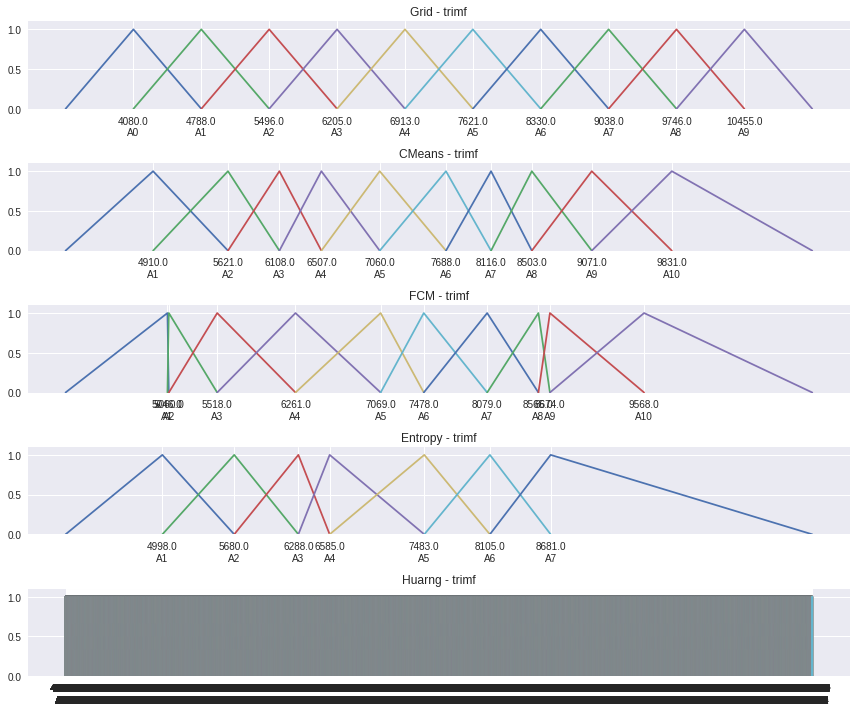

In [15]:
part = pUtil.explore_partitioners(dataset[:train_split], 10, methods=[Grid.GridPartitioner, CMeans.CMeansPartitioner, 
                                                           FCM.FCMPartitioner, Entropy.EntropyPartitioner,
                                                           Huarng.HuarngPartitioner], 
                                  mf=[mf.trimf])

In [20]:
for p in part:
    print(p)

Grid - trimf:
A0: trimf([3371.22335, 4079.5785, 4787.93365])
A1: trimf([4079.5785, 4787.93365, 5496.2888])
A2: trimf([4787.93365, 5496.2888, 6204.643950000001])
A3: trimf([5496.288799999999, 6204.64395, 6912.9991])
A4: trimf([6204.643949999999, 6912.999099999999, 7621.354249999999])
A5: trimf([6912.999099999999, 7621.354249999999, 8329.7094])
A6: trimf([7621.354249999999, 8329.7094, 9038.06455])
A7: trimf([8329.7094, 9038.06455, 9746.419699999999])
A8: trimf([9038.06455, 9746.419699999999, 10454.774849999998])
A9: trimf([9746.419699999999, 10454.774849999998, 11163.129999999997])

CMeans - trimf:
A1: trimf([4079.578, 4910.1, 5620.634])
A2: trimf([4910.1, 5620.634, 6108.287])
A3: trimf([5620.634, 6108.287, 6506.606])
A4: trimf([6108.287, 6506.606, 7060.017])
A5: trimf([6506.606, 7060.017, 7688.427])
A6: trimf([7060.017, 7688.427, 8115.937])
A7: trimf([7688.427, 8115.937, 8502.833])
A8: trimf([8115.937, 8502.833, 9071.387])
A9: trimf([8502.833, 9071.387, 9830.882])
A10: trimf([9071.387, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Several different mathods with transformation

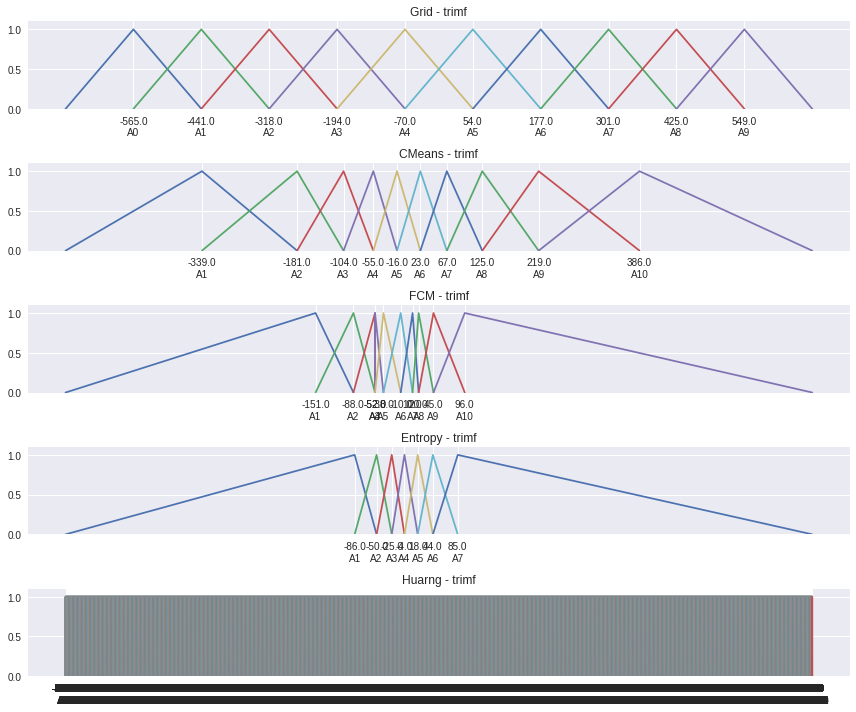

In [21]:
part = pUtil.explore_partitioners(dataset, 10, methods=[Grid.GridPartitioner, CMeans.CMeansPartitioner, 
                                                           FCM.FCMPartitioner, Entropy.EntropyPartitioner,
                                                           Huarng.HuarngPartitioner], 
                                  mf=[mf.trimf], transformation=tdiff)

In [22]:
for p in part:
    print(p)

Grid - trimf:
A0: trimf([-688.963, -565.213, -441.46299999999997])
A1: trimf([-565.213, -441.46299999999997, -317.71299999999997])
A2: trimf([-441.46299999999997, -317.71299999999997, -193.96299999999997])
A3: trimf([-317.71299999999997, -193.96299999999997, -70.21299999999997])
A4: trimf([-193.96299999999997, -70.21299999999997, 53.537000000000035])
A5: trimf([-70.21299999999997, 53.537000000000035, 177.28700000000003])
A6: trimf([53.537000000000035, 177.28700000000003, 301.03700000000003])
A7: trimf([177.28700000000003, 301.03700000000003, 424.78700000000003])
A8: trimf([301.03700000000003, 424.78700000000003, 548.537])
A9: trimf([424.78700000000003, 548.537, 672.287])

CMeans - trimf:
A1: trimf([-565.213, -339.175, -181.48])
A2: trimf([-339.175, -181.48, -104.465])
A3: trimf([-181.48, -104.465, -55.138])
A4: trimf([-104.465, -55.138, -15.889])
A5: trimf([-55.138, -15.889, 22.828])
A6: trimf([-15.889, 22.828, 66.646])
A7: trimf([22.828, 66.646, 125.426])
A8: trimf([66.646, 125.426, 2